In [36]:
import pandas as pd
import urllib.request
import numpy
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, accuracy_score
import pylab as plot

In [52]:
data = pd.read_csv("wine_quality_red.csv",)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
data.columns = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol','quality']

In [54]:
data.shape

(1599, 12)

In [55]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


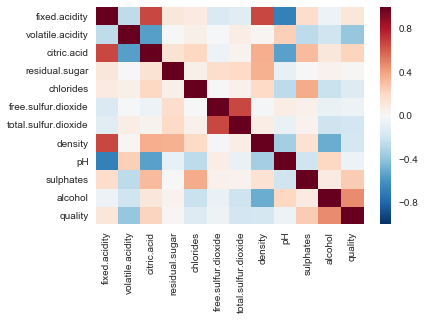

In [23]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
#infert = com.importr("ISLR")

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr)

In [14]:
X = data.drop('quality',1)
y = data['quality']

In [34]:

wineNames = numpy.array(list(data))

#take fixed holdout set 30% of data rows
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30,random_state=531)
# Train Gradient Boosting model to minimize mean squared error
nEst = 2000
depth = 7
learnRate = 0.01
subSamp = 0.5
wineGBMModel = ensemble.GradientBoostingRegressor(n_estimators=nEst,
                                                  max_depth=depth,
                                                  learning_rate=learnRate,
                                                  subsample = subSamp,
                                                  loss='ls')

wineGBMModel.fit(xTrain, yTrain)

# compute mse on test set
msError = []
predictions = wineGBMModel.staged_predict(xTest)

for p in predictions:
    msError.append(mean_squared_error(yTest, p))

print("MSE:",min(msError) )



MSE: 0.316827563259


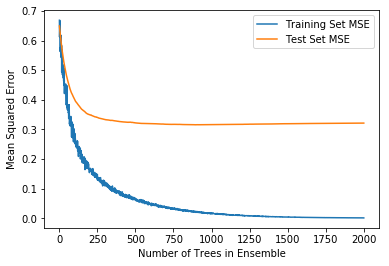

In [17]:
#plot training and test errors vs number of trees in ensemble
plot.figure()
plot.plot(range(1, nEst + 1), wineGBMModel.train_score_,
          label='Training Set MSE')
plot.plot(range(1, nEst + 1), msError, label='Test Set MSE')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.show()

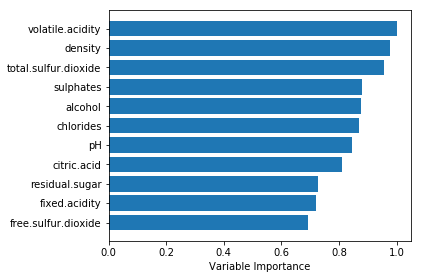

In [16]:
# Plot feature importance
featureImportance = wineGBMModel.feature_importances_
# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5

plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, wineNames[idxSorted])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()